## STAGE D - HAMOYA PROJECT

I was presented with the Africa Food production data to carry out analysis and visulaizations to enhance me come with a story for the project.

In [1]:
# Importing the required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import scipy.stats as st
from scipy.stats import pearsonr

In [2]:
# Importing the converted dataset

africa_prod = pd.read_csv("African_foodProd.csv")
africa_prod.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [3]:
# Ascertaining the shape(rows and columns) of the data

africa_prod.shape

(23110, 4)

In [4]:
# Checking the data info

africa_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [5]:
# Checking for null values

africa_prod.isnull().sum()

Country    0
Item       0
Year       0
Value      0
dtype: int64

In [6]:
# Statistics of the dataset

africa_prod.describe()

,Year,Value
count,23110.000000,23110.000000
mean,2008.498269,327.785201
std,2.871740,1607.940343
min,2004.000000,0.000000
25%,2006.000000,3.000000
50%,2008.000000,18.000000
75%,2011.000000,108.000000
max,2013.000000,54000.000000


## Visualizations

In [7]:
# Grouping the food productions according to the year

grouped_year = pd.DataFrame(africa_prod.groupby(africa_prod["Year"])["Value"].sum()).reset_index()

grouped_year

,Year,Value
0,2004,663006
1,2005,691257
2,2006,718602
3,2007,705659
4,2008,736804
5,2009,746870
6,2010,786466
7,2011,812214
8,2012,841667
9,2013,872571


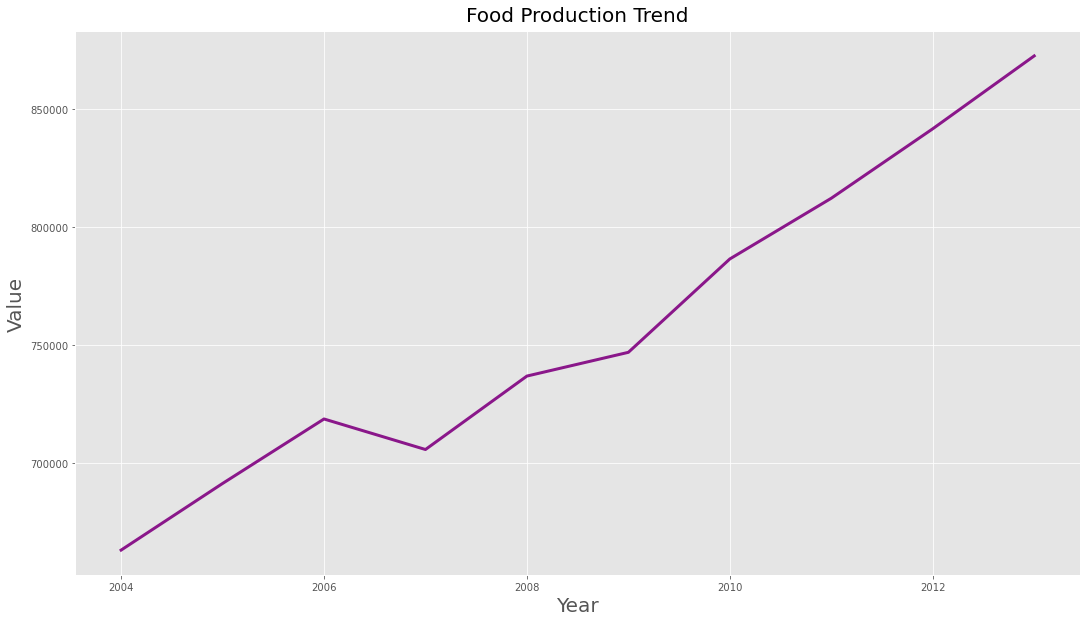

In [8]:
# Trend of Africa food production

plt.figure(figsize = (18, 10))
plt.plot(grouped_year["Year"], grouped_year["Value"], linewidth = 3, alpha = 0.9, color = "purple")

plt.title("Food Production Trend", fontsize = 20, pad = 10)
plt.xlabel("Year", size = 20)
plt.ylabel("Value", size = 20)

plt.show()

The chart above shows the trend in food production betweeen the year 2004 and 2013. There have been a constant rise in food prodution from 2009 to 2013.

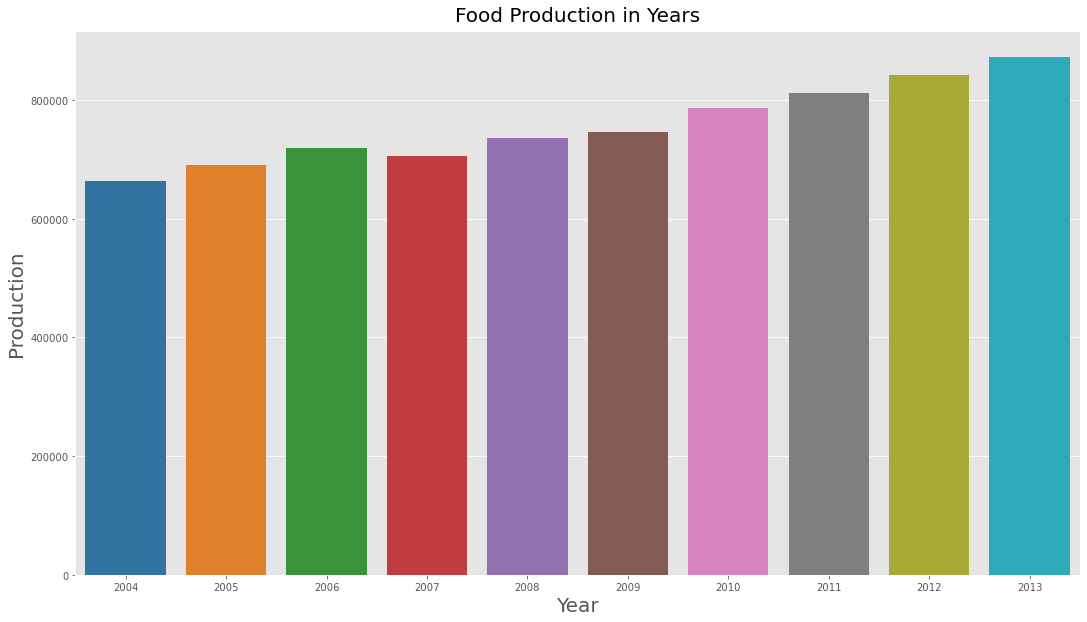

In [9]:
# Number of Food items produced per year

plt.figure(figsize = (18,10))
year_prod = africa_prod.groupby('Year').Value.sum().to_frame().reset_index()
sns.barplot(x=year_prod.Year, y=year_prod.Value, palette = "tab10")
plt.xlabel("Year", size = 20)
plt.ylabel("Production", size = 20)
plt.title('Food Production in Years', fontsize = 20, pad = 10)
plt.show()

As shown above, There have been a constant rise in the production of food items produced foodrom 2009 to 2013.

In [10]:
# Country with total productions

country_g = pd.pivot_table(data = africa_prod[["Country", "Value"]], index = ["Country"], values = "Value", aggfunc = "sum")
country_g.sort_values(by = "Value", ascending = False).head(10)

,Value
Country,
Nigeria,1628030
Egypt,877498
South Africa,579592
Ethiopia,350693
United Republic of Tanzania,332802
Sudan,301584
Ghana,295004
Uganda,278421
Morocco,271821


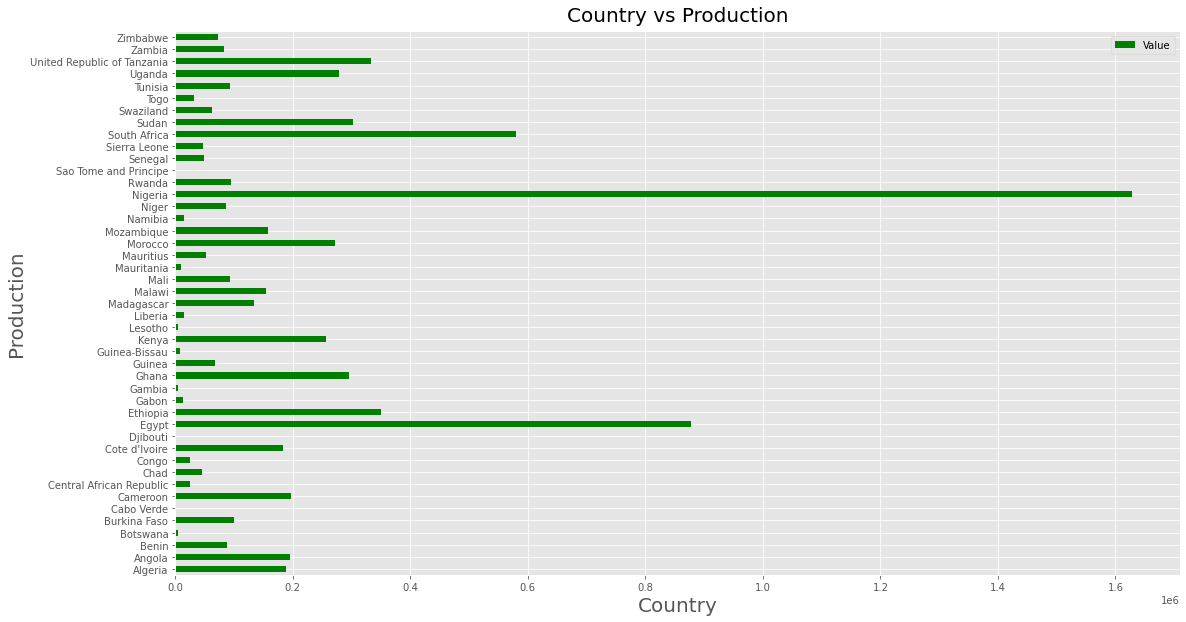

In [11]:
# Food producing countries in Africa

country_g.plot(kind = "barh", color = "green", figsize = (18, 10))
plt.xlabel("Country", size = 20)
plt.ylabel("Production", size = 20)
plt.title("Country vs Production", fontsize = 20, pad = 10)
plt.show()

From the chart above, it is seen that Nigeria, Egypt and South Africa are the top three food producing countries in Africa between the year 2004 and 2013.

In [12]:
# Food item production

item_g = pd.pivot_table(data = africa_prod[["Item", "Value"]], index = ["Item"], values = "Value", aggfunc = "sum")
item_g.sort_values(by = "Value", ascending = False).head(10)

,Value
Item,
Cassava and products,1118948
Sugar cane,887008
Maize and products,574948
Yams,511523
"Vegetables, Other",410403
Milk - Excluding Butter,380380
Sorghum and products,241080
Wheat and products,229875
"Beverages, Fermented",227037


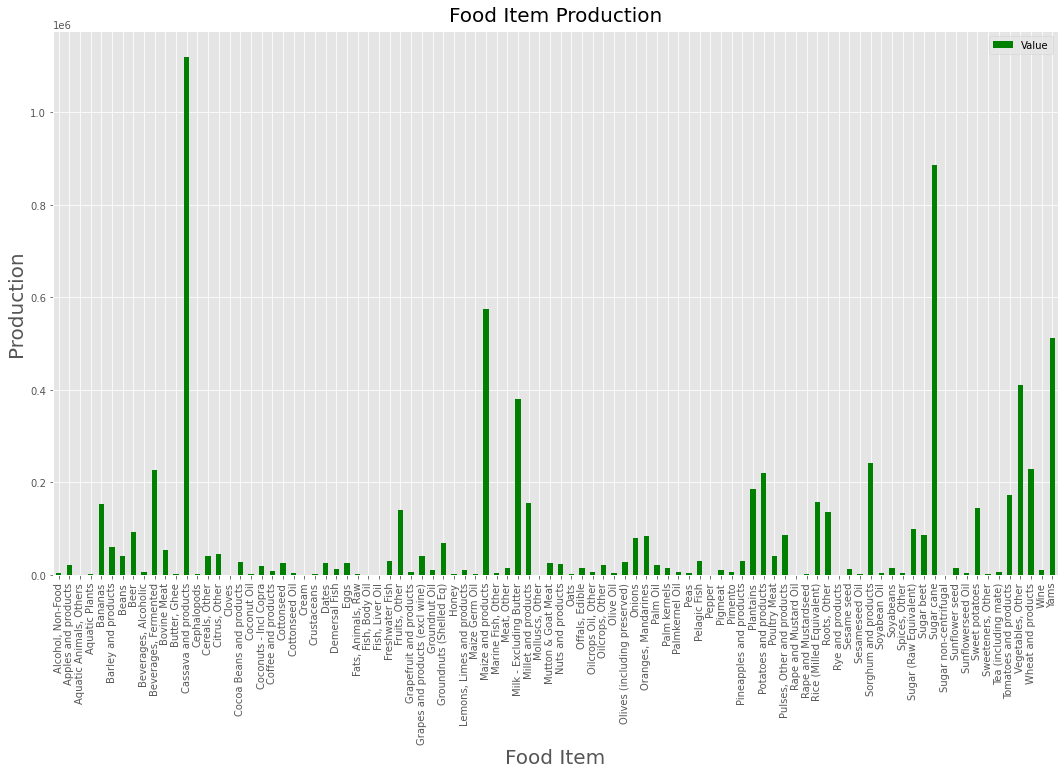

In [13]:
# Food items produced in Africa

item_g.plot(kind = "bar", color = "green", figsize = (18, 10))
plt.xlabel("Food Item", size = 20)
plt.ylabel("Production", size = 20)
plt.title("Food Item Production", fontsize = 20, pad = 10)
plt.show()

From the chart above, Cassave products, sugarcane and maize products were the major food items produced between the year 2004 and 2013.

<AxesSubplot:xlabel='Year', ylabel='Value'>

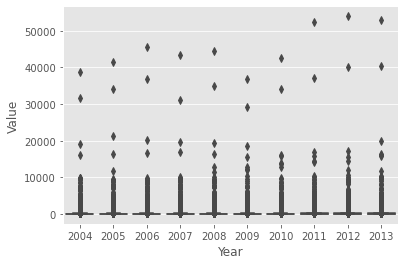

In [14]:
# Checking for Outliers

sns.boxplot(x = "Year", y = "Value", data = africa_prod)

In [15]:
# Average food production per year

country_g = pd.pivot_table(data = africa_prod[["Year", "Value"]], index = ["Year"], values = "Value", aggfunc = "mean")
country_g.sort_values(by = "Value", ascending = False).head(10)

,Value
Year,
2013,378.227568
2012,364.831816
2011,351.303633
2010,340.166955
2009,323.040657
2008,318.686851
2006,310.814014
2007,305.215830
2005,298.986592


In [16]:
# Total produce of each country per yaer

grouped = pd.DataFrame(africa_prod.groupby([africa_prod["Year"],africa_prod["Country"]])["Value"].sum())

grouped

Value
Year Country                           
2004 Algeria                      15536
     Angola                       13028
     Benin                         7963
     Botswana                       461
     Burkina Faso                  8323
...                                 ...
2013 Tunisia                       9949
     Uganda                       26321
     United Republic of Tanzania  40849
     Zambia                       10526
     Zimbabwe                      7914

[450 rows x 1 columns]

In [17]:
# Production of Oats per Country in 2010

africa_prod[(africa_prod["Year"] == 2010) & (africa_prod["Item"] == "Oats")]

,Country,Item,Year,Value
46,Algeria,Oats,2010,88
6406,Ethiopia,Oats,2010,48
7746,Ghana,Oats,2010,0
9286,Kenya,Oats,2010,3
10026,Lesotho,Oats,2010,0
13186,Morocco,Oats,2010,37
17816,South Africa,Oats,2010,34
20056,Tunisia,Oats,2010,2
22516,Zimbabwe,Oats,2010,1


## Correlation

In [18]:
corr, _ = pearsonr(africa_prod["Value"], africa_prod["Year"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.017


The Pearsons Correlation of 0.017 shows that there is no linear relationship between the items produced and the year of production.

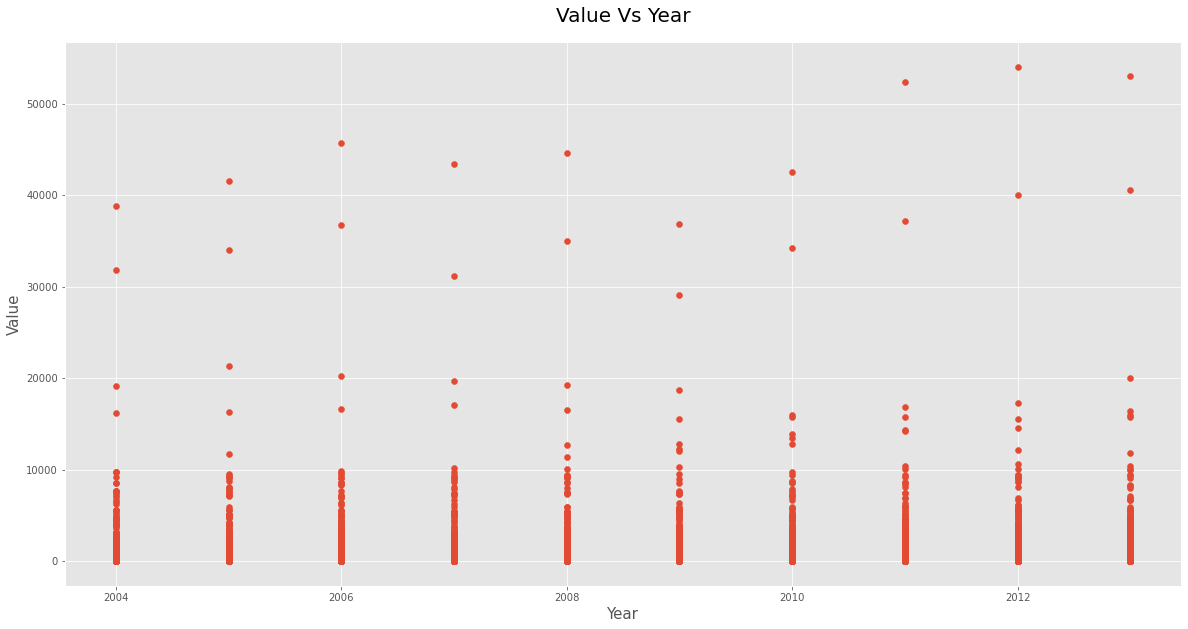

In [19]:
## Showing the correlation with a scatter plot

x = africa_prod["Year"]
y = africa_prod["Value"]


x_axis = africa_prod["Year"]
y_axis = africa_prod["Value"]

plt.figure(figsize = (20, 10))
plt.scatter(x, y)
plt.title("Value Vs Year", fontsize = 20, pad = 20)
plt.xlabel("Year", size = 15)
plt.ylabel("Value", size = 15)
plt.show()

From the plot above, the points fall randomly on the plot and this indicates that there is no linear relationship between the variables.

## THANK YOU